# EDA of selected file with "Överensstämelse" data from SCB

I manually selected data from SCB and renamed the column categories in excel for simplicity



In [2]:
import pandas as pd

df = pd.read_excel('../data/överensstämmelse-2024.xlsx')

df

,Kategori,hel,viss_del,inte_alls
0,Totalt,62,25,13
1,Data/It,62,22,16
2,"Ekonomi, administration och försäljning",69,23,9
3,Friskvård och kroppsvård,60,18,22
4,"Hotell, restaurang och turism",45,34,21
5,Hälso- och sjukvård samt socialt arbete,61,29,10
6,Journalistik och information,53,35,13
7,Juridik,54,39,7
8,"Kultur, media och design",59,19,22
9,"Lantbruk, djurvård, trädgård, skog och fiske",68,24,8


In [3]:
df.dtypes

Kategori     object
hel           int64
viss_del      int64
inte_alls     int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Kategori   16 non-null     object
 1   hel        16 non-null     int64 
 2   viss_del   16 non-null     int64 
 3   inte_alls  16 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 644.0+ bytes


In [5]:
df_total = df.iloc[0]

df_total


Kategori     Totalt
hel              62
viss_del         25
inte_alls        13
Name: 0, dtype: object

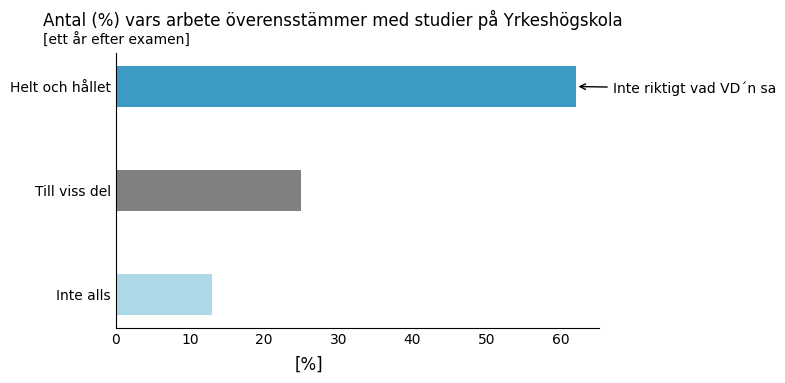

In [ ]:
import matplotlib.pyplot as plt

def överenstämmelse():

    df = pd.read_excel('../data/överensstämmelse-2024.xlsx')

    df_total = df.iloc[0]

    values = df_total[["hel", "viss_del", "inte_alls"]].values
    labels = ["Helt och hållet", "Till viss del", "Inte alls"]

    
    y_positions = [0, 0.5, 1.0]  

    fig, ax = plt.subplots(figsize=(8, 4))

    ax.barh(
        y=y_positions,
        width=values,
        color=["#3D9AC5", "grey", "lightblue"],
        height=0.2,  
    )

   
    ax.set_yticks(y_positions)
    ax.set_yticklabels(labels)

    
    ax.invert_yaxis()
    # --Text och labels

    ax.text(
        x=-0.15, y=1.10,
        s="Antal (%) vars arbete överensstämmer med studier på Yrkeshögskola",
        transform=ax.transAxes,
        ha="left",
        fontsize=12,
    )

    ax.text(
    x=-0.15, y=1.03,
    s="[ett år efter examen]",
    transform=ax.transAxes,
    ha="left",
    fontsize=10,
)

    ax.set_xlabel("[%]", fontsize=12)
    ax.xaxis.set_label_coords(0.4, -0.1)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.tick_params(axis="x", length=0)
    ax.tick_params(axis="y", length=0)


 # -- Rita pil
    ax.annotate(
    "Inte riktigt vad VD´n sa",
    xy=(values[0], y_positions[0]),
    xytext=(values[0] + 5, y_positions[0] + 0.03),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=10,
    ha="left"
)
    
    return fig, ax

fig, ax = överenstämmelse()
fig.tight_layout()


Importing similar data with gender

In [9]:
import pandas as pd

df_gender = pd.read_excel('../data/cleaned_gender_data.xlsx')

df_gender

,gender,category,helt,viss_del,inte_alls
0,Kvinnor,Totalt,62,25,12
1,Kvinnor,Data/It,65,20,15
2,Kvinnor,"Ekonomi, administration och försäljning",70,22,8
3,Kvinnor,"Hotell, restaurang och turism",43,35,21
4,Kvinnor,Hälso- och sjukvård samt socialt arbete,60,29,10
5,Kvinnor,"Kultur, media och design",57,20,23
6,Kvinnor,"Lantbruk, djurvård, trädgård, skog och fiske",64,28,9
7,Kvinnor,Pedagogik och undervisning,43,30,26
8,Kvinnor,Samhällsbyggnad och byggteknik,58,25,17
9,Kvinnor,Säkerhetstjänster,76,11,13


In [10]:
import duckdb

df_gender2 = duckdb.query(
    """--sql
    SELECT gender, category, inte_alls
    FROM df_gender
    QUALIFY ROW_NUMBER() OVER (PARTITION BY gender ORDER BY inte_alls DESC) <= 3
    """
).to_df()

df_gender2



,gender,category,inte_alls
0,Män,Pedagogik och undervisning,22
1,Män,"Kultur, media och design",20
2,Män,"Hotell, restaurang och turism",19
3,Kvinnor,Pedagogik och undervisning,26
4,Kvinnor,"Kultur, media och design",23
5,Kvinnor,"Hotell, restaurang och turism",21


Creating graph for top three categories "inte alls"

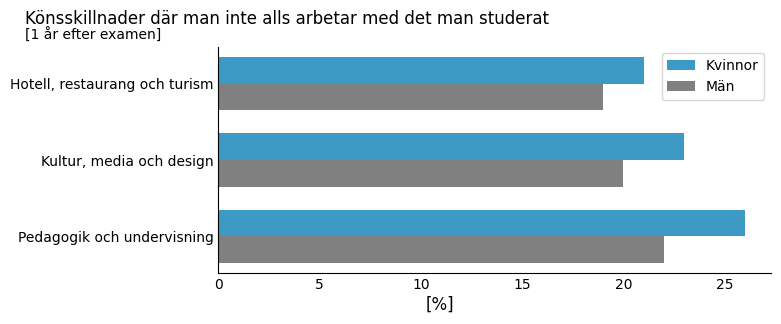

In [ ]:
def gender():

 

    df_gender2 = duckdb.query(
    """--sql
    SELECT gender, category, inte_alls
    FROM df_gender
    QUALIFY ROW_NUMBER() OVER (PARTITION BY gender ORDER BY inte_alls DESC) <= 3
    """
    ).to_df()

    df_gender2


    df_pivot = df_gender2.pivot(index="category", columns="gender", values="inte_alls").fillna(0)

    
    fig, ax = plt.subplots(figsize=(8, 4))

    bar_width = 0.35
    y_positions = range(len(df_pivot))

    ax.text(
        x=-0.35, y=1.10,
        s="Könsskillnader där man inte alls arbetar med det man studerat",
        transform=ax.transAxes,
        ha="left",
        fontsize=12,
    )

    ax.text(
        x=-0.35, y=1.03,
        s="[1 år efter examen]",
        transform=ax.transAxes,
        ha="left",
        fontsize=10, 
    )

    fig.subplots_adjust(top=1.5) 

   #-- För varje kön
    ax.barh(
        [y - bar_width/2 for y in y_positions],
        df_pivot["Kvinnor"],
        height=bar_width,
        label="Kvinnor",
        color="#3D9AC5"
    )
    ax.barh(
        [y + bar_width/2 for y in y_positions],
        df_pivot["Män"],
        height=bar_width,
        label="Män",
        color="grey"
    )

 
    ax.set_yticks(y_positions)
    ax.set_yticklabels(df_pivot.index)
    ax.invert_yaxis()  

  
    ax.set_xlabel("[%]", fontsize=12)
    ax.xaxis.set_label_coords(0.4, -0.1)

    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis="x", length=0)
    ax.tick_params(axis="y", length=0)
    ax.legend()

    return fig, ax


fig, ax = gender()
fig.tight_layout()